# Reading data from CSV file and filtering Apple stock price 

In [23]:
import pandas as pd
import numpy as np
allData = pd.read_csv('Data//all_stocks_5yr.csv', index_col=['date'], parse_dates=['date'])
df = allData[allData['Name'] == 'AAPL']
del df['open']
del df['high']
del df['low']
del df['volume']
del df['Name']

# Simple Moving Average (SMA)

In [24]:
def simple_moving_average(series, n = 3) :
    cumsum, moving_aves = [0], []
    for i, x in enumerate(series, 1):
        cumsum.append(cumsum[i-1] + x)
        if i >= n:
            moving_ave = (cumsum[i] - cumsum[i-n]) / n
        else:
            moving_ave = None #seri[i-1]
        moving_aves.append(moving_ave)
        
    return moving_aves

In [29]:
pd.options.mode.chained_assignment = None  # default='warn'

result = pd.DataFrame(columns=['window', 'amount'])

for window in range(2, 365):
    df['sma'] = simple_moving_average(df['close'], window)
    df['sma_prev1'] = df['sma'].shift(1)
    df['sma_prev2'] = df['sma'].shift(2)
    df['sma_prev3'] = df['sma'].shift(3)
    df['sma_prev4'] = df['sma'].shift(4)
    df['sell'] = (df['close'] < df['sma_prev1']) & (df['sma_prev1'] < df['sma_prev2']) & (df['sma_prev3'] > df['sma_prev4'])  & (df['sma_prev3'] > df['sma_prev2'])
    df['buy'] = (df['close'] > df['sma_prev1']) & (df['sma_prev1'] > df['sma_prev2']) & (df['sma_prev3'] < df['sma_prev4'])  & (df['sma_prev3'] < df['sma_prev2'])
    df['buy_val'] = df[df['buy'] == True]['sma']
    df['sell_val'] = df[df['sell'] == True]['sma']
    
    amount = 0
    share = 10000.0 / df.iloc[0]['close']
    #print('Buy: ', df.index[0], amount, share, df.iloc[0]['close'])
    for index, row in df.iterrows():
        if (amount > 0) and (row['buy'] == True):
            #print('Buy: ', index,  amount, share, row['close'])
            share = amount / row['close']
            amount = 0
        elif (amount == 0) and (row['sell'] == True):
            #print('Sel: ', index, amount, share, row['close'])
            amount = share * row['close']
            share = 0 
    #print(window, amount, share * df.iloc[-1]['close'])
    result.loc[window] = [window, (amount + share * df.iloc[-1]['close']) /10000]


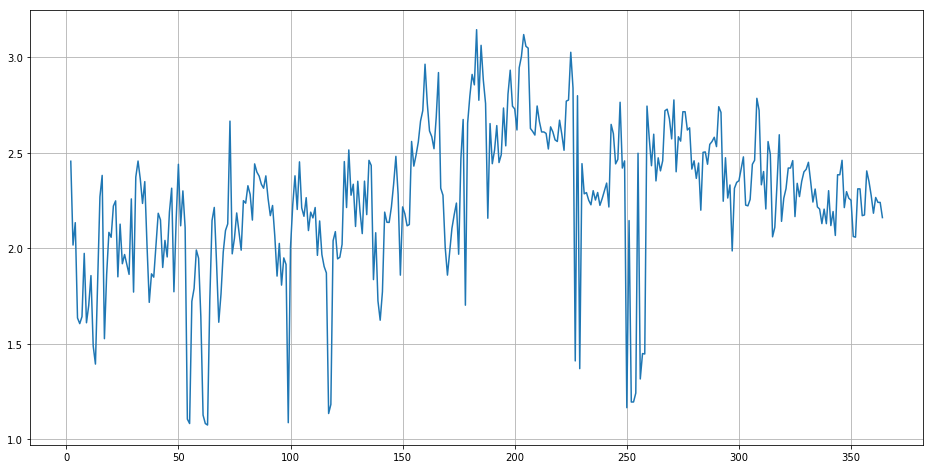

3.16931659693


In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(result['amount'])
plt.grid(True)
plt.show()
print(df.iloc[-1]['close'] / df.iloc[1]['close'])

In [25]:
pd.options.mode.chained_assignment = None  # default='warn'
df['sma'] = simple_moving_average(df['close'], 15)

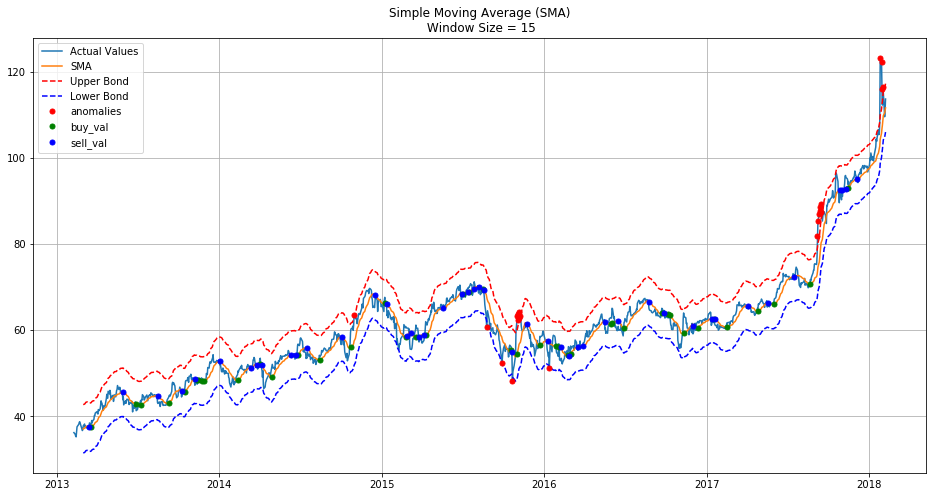

In [28]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
#from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
window = 15
scale = 1.96

plt.figure(figsize=(16,8))
plt.title("Simple Moving Average (SMA)\n Window Size = {}".format(window))
#plt.plot(rolling_mean, "g", label="SMA")

plt.plot(df['close'], label="Actual Values")
plt.plot(df['sma'], label="SMA")


rolling_mean = df['sma']
series = df['close']
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
df['lower_bond'] = rolling_mean - (mae + scale * deviation)
df['upper_bond'] = rolling_mean + (mae + scale * deviation)
plt.plot(df['upper_bond'], "r--", label="Upper Bond")
plt.plot(df['lower_bond'], "b--",  label="Lower Bond")
        
df['anomalies'] = float('NaN')
df['anomalies'][series < df['lower_bond']] = series[series < df['lower_bond']]
df['anomalies'][series > df['upper_bond']] = series[series > df['upper_bond']]
plt.plot(df['anomalies'], "ro", markersize = 5)


df['sma_prev1'] = df['sma'].shift(1)
df['sma_prev2'] = df['sma'].shift(2)
df['sma_prev3'] = df['sma'].shift(3)
df['sma_prev4'] = df['sma'].shift(4)
df['sell'] = (df['sma_prev2'] > df['sma_prev1']) & (df['sma_prev3'] < df['sma_prev2']) & (df['sma_prev3'] > df['sma_prev4'])
df['buy'] = (df['sma_prev2'] < df['sma_prev1']) & (df['sma_prev3'] > df['sma_prev2']) & (df['sma_prev3'] < df['sma_prev4'])
df['buy_val'] = df[df['buy'] == True]['sma']
df['sell_val'] = df[df['sell'] == True]['sma']

plt.plot(df['buy_val'], "go", markersize = 5)
plt.plot(df['sell_val'], "bo", markersize = 5)


plt.legend(loc="upper left")    
plt.grid(True)
plt.show()

In [51]:
amount = 0
share = 10000.0 / df.iloc[0]['close']
print('Buy: ', df.index[0], amount, share, df.iloc[0]['close'])

for index, row in df.iterrows():
    if (amount > 0) and (row['buy'] == True):
        print('Buy: ', index,  amount, share, row['close'])
        share = amount / row['close']
        amount = 0
    elif (amount == 0) and (row['sell'] == True):
        print('Sel: ', index, amount, share, row['close'])
        amount = share * row['close']
        share = 0 

print(amount, share)

29328.418529621253 0


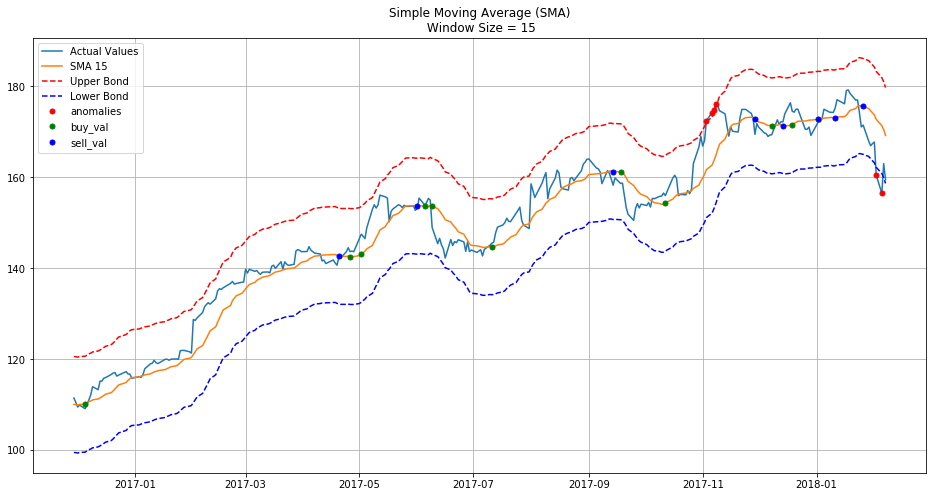

In [40]:
df = df[-300:]
plt.figure(figsize=(16,8))
plt.title("Simple Moving Average (SMA)\n Window Size = {}".format(window))
#plt.plot(rolling_mean, "g", label="SMA")

plt.plot(df['close'], label="Actual Values")
plt.plot(df['sma15'], label="SMA 15")


rolling_mean = df['sma15']
series = df['close']
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
df['lower_bond'] = rolling_mean - (mae + scale * deviation)
df['upper_bond'] = rolling_mean + (mae + scale * deviation)
plt.plot(df['upper_bond'], "r--", label="Upper Bond")
plt.plot(df['lower_bond'], "b--",  label="Lower Bond")
        
df['anomalies'] = float('NaN')
df['anomalies'][series < df['lower_bond']] = series[series < df['lower_bond']]
df['anomalies'][series > df['upper_bond']] = series[series > df['upper_bond']]
plt.plot(df['anomalies'], "ro", markersize = 5)

df['sma15_prev1'] = df['sma15'].shift(1)
df['sma15_prev2'] = df['sma15'].shift(2)
df['sma15_prev3'] = df['sma15'].shift(3)
df['sma15_prev4'] = df['sma15'].shift(4)
df['sell'] = (df['sma15_prev2'] > df['sma15_prev1']) & (df['sma15_prev3'] < df['sma15_prev2']) & (df['sma15_prev3'] > df['sma15_prev4'])
df['buy'] = (df['sma15_prev2'] < df['sma15_prev1']) & (df['sma15_prev3'] > df['sma15_prev2']) & (df['sma15_prev3'] < df['sma15_prev4'])
df['buy_val'] = df[df['buy'] == True]['sma15']
df['sell_val'] = df[df['sell'] == True]['sma15']

plt.plot(df['buy_val'], "go", markersize = 5)
plt.plot(df['sell_val'], "bo", markersize = 5)


plt.legend(loc="upper left")    
plt.grid(True)
plt.show()